# Library Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

# Data Imports

In [2]:
pop = pd.read_csv('Datasets/POP.csv').drop(['realtime_start','realtime_end'],axis=1).set_index('date')
pop.index  = pd.DatetimeIndex(pop.index)
pop = pop.rename(columns = {'value':'population'})
display(pop.head())
display(pop.info())
display(pop.describe())

,population
date,
1952-01-01,156309.0
1952-02-01,156527.0
1952-03-01,156731.0
1952-04-01,156943.0
1952-05-01,157140.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 816 entries, 1952-01-01 to 2019-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  816 non-null    float64
dtypes: float64(1)
memory usage: 12.8 KB


None

,population
count,816.000000
mean,243847.767826
std,50519.140567
min,156309.000000
25%,201725.250000
50%,239557.500000
75%,289364.250000
max,330309.946000


# Visualizing Data

In [3]:
px.line(data_frame=pop,y='population')

# Adfuller Test

In [4]:
pop_diff = pop.diff().diff().dropna()
fig = px.line(data_frame=pop_diff,y='population')
fig.show()
adfuller(pop_diff)

(-7.22112781789806,
 2.1100121875850814e-10,
 21,
 792,
 {'1%': -3.438633612472885,
  '5%': -2.865196199232788,
  '10%': -2.5687169024206713},
 6560.129833849592)

# ACF, PACF check

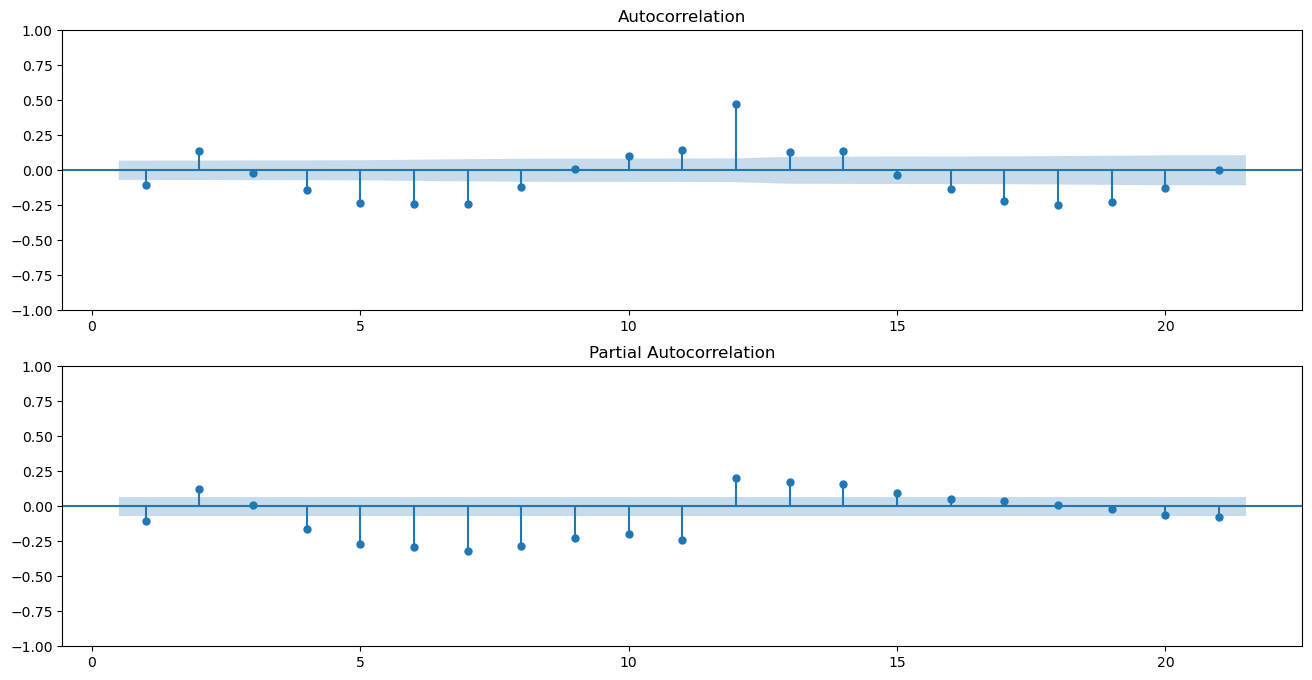

In [5]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,8))

plot_acf(pop_diff, lags=21, zero=False, ax=ax1)
plot_pacf(pop_diff, lags=21, zero=False , ax=ax2)
plt.show()

# ARIMA model building

In [6]:
model = ARIMA(pop, order=(3,2,0))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             population   No. Observations:                  816
Model:                 ARIMA(3, 2, 0)   Log Likelihood               -3682.736
Date:                Wed, 24 Apr 2024   AIC                           7373.471
Time:                        13:37:30   BIC                           7392.279
Sample:                    01-01-1952   HQIC                          7380.691
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0912      0.014     -6.629      0.000      -0.118      -0.064
ar.L2          0.1238      0.030      4.151      0.000       0.065       0.182
ar.L3          0.0089      0.041      0.218      0.8

/opt/homebrew/Caskroom/miniforge/base/envs/py_projects/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/homebrew/Caskroom/miniforge/base/envs/py_projects/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/homebrew/Caskroom/miniforge/base/envs/py_projects/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



# Visualize Prediction

In [7]:
forecast = results.get_prediction(start=-120)
mean_forecast = pd.DataFrame(forecast.predicted_mean)
confidence_intervals = pd.DataFrame(forecast.conf_int())

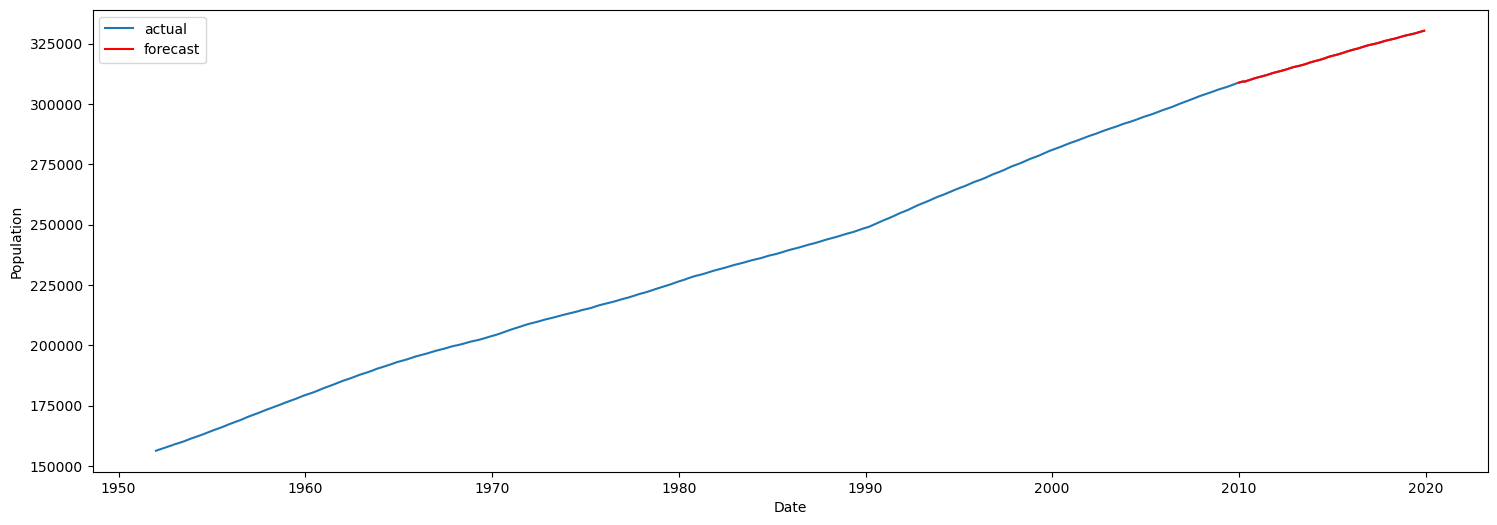

In [8]:
fig, ax = plt.subplots(figsize=(18,6))
plt.plot(pop,label='actual')
plt.plot(mean_forecast.index,mean_forecast.values,color='red',label='forecast')
# plt.fill_between(confidence_intervals.index, confidence_intervals['lower population'], confidence_intervals['upper population'], color='grey')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.show()